<a href="https://colab.research.google.com/github/fpinto2021/Mechanical-Vibrations/blob/main/Project1Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Max displacement (0.298 m) exceeds limit (0.285 m). Finding minimum damping...
Minimum required damping: 184.50 kg/s (Max displacement: 0.200 m)


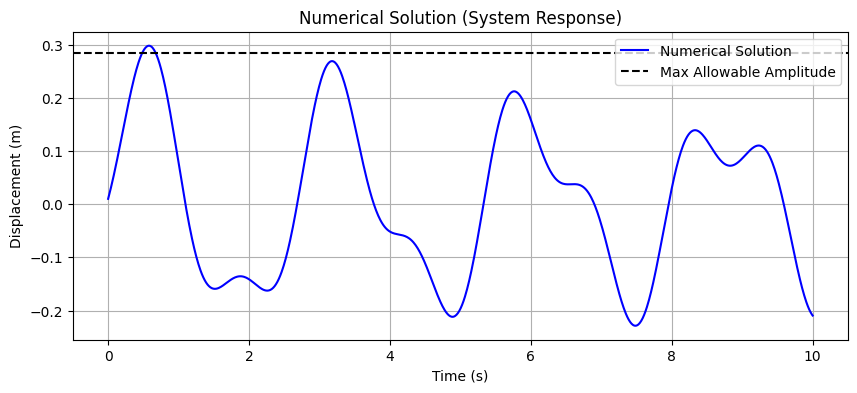

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Given parameters
m = 100
k = 525
c = 10
F0 = 150
omega = 5

# Maximum allowable amplitude
max_amplitude = 0.285
target_amplitude = 0.2  # If needed, find damping for this

# Defining first-order equations
def system(t, y, c):
    x, v = y
    dxdt = v
    dvdt = (F0 * np.cos(omega * t) - c * v - k * x) / m
    return [dxdt, dvdt]

# Initial conditions
x0 = 0.01
v0 = 0.5
t_span = (0, 10)
t_eval = np.linspace(0, 10, 1000)

# Solving with initial damping
sol = solve_ivp(system, t_span, [x0, v0], args=(c,), t_eval=t_eval)

# Find max displacement
max_displacement = np.max(np.abs(sol.y[0]))

# Adjust damping (if needed)
if max_displacement > max_amplitude:
    print(f"Max displacement ({max_displacement:.3f} m) exceeds limit ({max_amplitude:.3f} m). Finding minimum damping...")

    # Function to compute damping
    def find_min_damping():
        c_test = c
        while True:
            sol_test = solve_ivp(system, t_span, [x0, v0], args=(c_test,), t_eval=t_eval)
            max_disp = np.max(np.abs(sol_test.y[0]))
            if max_disp <= target_amplitude:
                return c_test, max_disp
            c_test += 0.5

    c_min, max_disp_new = find_min_damping()
    print(f"Minimum required damping: {c_min:.2f} kg/s (Max displacement: {max_disp_new:.3f} m)")
else:
    print(f"Max displacement ({max_displacement:.3f} m) is within the allowable limit ({max_amplitude:.3f} m). No extra damping needed.")

# Plotting the system response and max amplitude
plt.figure(figsize=(10, 4))
plt.plot(sol.t, sol.y[0], 'b', label="Numerical Solution")
plt.axhline(max_amplitude, color='k', linestyle='dashed', label="Max Allowable Amplitude")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Numerical Solution (System Response)")
plt.legend()
plt.grid()
plt.show()
